In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
cd Downloads

/Users/kantha/Downloads


In [3]:
cancer = pd.read_csv('KNN.csv')

In [4]:
cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
7,87880,M,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,...,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860
8,862989,B,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,...,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552
9,89827,B,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,...,11.92,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080


In [5]:
del cancer['id']

In [6]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [7]:
import seaborn as sns

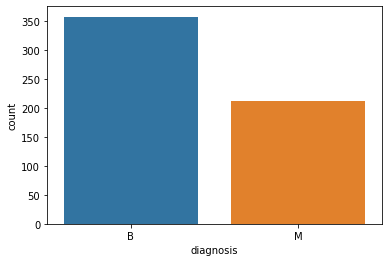

In [8]:
sns.countplot(cancer['diagnosis'])

In [9]:
#Sampling
X = cancer.iloc[:,1:]
print(X.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        12.32         12.39           78.85      464.1          0.10280   
1        10.60         18.95           69.28      346.4          0.09688   
2        11.04         16.83           70.92      373.2          0.10770   
3        11.28         13.39           73.00      384.8          0.11640   
4        15.19         13.21           97.65      711.8          0.07963   

   compactness_mean  concavity_mean  points_mean  symmetry_mean  \
0           0.06981         0.03987      0.03700         0.1959   
1           0.11470         0.06387      0.02642         0.1922   
2           0.07804         0.03046      0.02480         0.1714   
3           0.11360         0.04635      0.04796         0.1771   
4           0.06934         0.03393      0.02657         0.1721   

   dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.05955  ...         13.50          15.64            86.97

In [10]:
y = cancer.iloc[:,:1]
print(y.head())

  diagnosis
0         B
1         B
2         B
3         B
4         B


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 1234)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455, 1)
(114, 30)
(114, 1)


In [13]:
#Training
model = LogisticRegression()
#model = neighbors.KNeighborsClassifier()
#model = DecisionTreeClassifier(criterion='gini', max_depth= 9,class_weight={'B':1, 'M':2})
#model = SVC(kernel='linear',  gamma = 10, C= 1)


model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
#Testing
predicted = model.predict(X_test)
predicted

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M'], dtype=object)

In [15]:
y_test['diagnosis'].value_counts()

B    69
M    45
Name: diagnosis, dtype: int64

In [16]:
#Evaluation
#Confusion Matrix
print(metrics.confusion_matrix(y_test, predicted))

[[67  2]
 [ 4 41]]


In [27]:
y_test['diagnosis'].value_counts()

B    74
M    40
Name: diagnosis, dtype: int64

In [17]:
#Classification Report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           B       0.94      0.97      0.96        69
           M       0.95      0.91      0.93        45

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [19]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = model, X = X,\
     y = y, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))


Accuracy Mean 0.9492999740731138 Accuracy Variance      0.03331827012232107


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_

In [49]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicted)

0.9035087719298246

In [53]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[8, 10,12]}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)
clf.best_params_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'entropy', 'max_depth': 12}

In [51]:
predicted = clf.predict(X_test)
predicted

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M'], dtype=object)

In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicted)

0.9385964912280702